# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
# read the data
df = pd.read_csv('BankChurners.csv')
# returns the first 5 rows
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
# returns the last 5 rows
df.tail(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


## Data Overview

- Observations
- Sanity checks

In [ ]:
# get number of rows and cols of the dataset
dataframe_shape = df.shape
# get number of rows of the dataset
num_rows = dataframe_shape[0]
# get number of cols of the dataset
num_columns = dataframe_shape[1]

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 10127
Number of columns: 21


**Observations:**

- Number of rows: 10127
- Number of columns: 21

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

**Observations:**
- Most columns have complete data with 10,127 non-null entries.
- There are missing entries in Education_Level and Marital_Status
- The mix of data types (int64, float64, object) indicates that the data set includes numerical as well as categorical variables.
- Categorical variables (object type) such as Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Category, and Card_Category

In [ ]:
# check missing data from the dataset by col wise
df.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

**Observations**
- Education_Level missing enteries are 1519
- Marital_Status  missing data are 749

In [ ]:
# find the statitical summary for the numerical cols of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


**Observations:**

- **Customer Age:** Average age is mid-40s, with a broad age range, suggesting customers from various life stages.
- **Dependent Count:** Average of about 2 dependents per customer, indicating varied family sizes.
- **Months on Book:** Average customer relationship with the bank is about 3 years, showing a mix of new and long-standing customers.
- **Total Relationship Count:** Customers engage with an average of 4 bank products, indicating active usage of bank services.
- **Months Inactive:** Average inactivity period is 2 months per year, important for understanding customer engagement.
- **Contact Count:** Customers contact the bank 2-3 times per year on average.
- **Credit Limit:** Wide range of credit limits, suggesting varied financial profiles among customers.
- **Total Revolving Balance:** Moderate average balance, indicating diverse credit use.
- **Avg Open To Buy:** Significant variability in available credit, reflecting diverse spending habits.
- **Total Amt Chng Q4 to Q1:** Variability in transaction amounts across quarters, possibly indicating seasonal spending patterns.
- **Total Transaction Amount:** Wide range in transaction amounts, showing diverse spending behaviors.
- **Total Transaction Count:** Range in transaction counts indicates varying levels of account activity.
- **Total Count Chng Q4 to Q1:** Changes in transaction count could reflect seasonal spending changes.
- **Avg Utilization Ratio:** Generally low but with some nearing full utilization, showing a range of credit usage habits.

In [ ]:
df.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


**Observations:**

- **Customer Retention:** With 8,500 out of 10,127 customers being "Existing Customers," the bank appears to have a high retention rate. This suggests effective customer satisfaction or loyalty strategies.

- **Gender Distribution:** The dataset has a slightly higher number of female customers (5,358) than male. This could influence marketing strategies and product offerings to cater more effectively to the predominant gender.

- **Educational Background:** A significant portion of customers are graduates (3,128 out of 8,608). This indicates a customer base with a higher educational level, which could impact their financial needs and preferences.

- **Marital Status:** The majority of customers are married (4,687 out of 9,378). Financial products and services could be tailored to appeal to this demographic, potentially focusing on family or joint financial solutions.

- **Income Level:** The most common income category is "Less than $40K" (3,561 out of 10,127), suggesting that a large segment of the bank's customer base is in the lower income bracket. This might influence the bank’s approach to credit risk and the types of financial products offered.

- **Card Category Preference:** A vast majority of customers (9,436 out of 10,127) hold the "Blue" card, likely a basic or standard card offering. This indicates a customer base that might be more conservative in financial products or less inclined to premium services.

In [ ]:
for i in df.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
**************************************************

**Observations:**

- **Gender Distribution:** The dataset has a relatively balanced distribution of genders with 5,358 females and 4,769 males. This suggests a good representation of both genders in the data.

- **Educational Background Diversity:** Education levels vary widely among customers. The majority are graduates (3,128), followed by high school graduates (2,013). This diversity can be indicative of a varied customer base in terms of education.

- **Marital Status:** A significant number of customers are married (4,687), followed by singles (3,943), and a smaller portion of divorced customers (748). This can be useful for marketing strategies targeting different marital demographics.

- **Income Categories:** The 'Less than $40K' income category has the highest representation (3,561), indicating that a large portion of the bank's customers might be from the lower income bracket. The presence of an anomalous category 'abc' (1,112) suggests there might be some data entry errors or unclassified data in the income category.

- **Card Categories:** A vast majority of customers hold the 'Blue' card category (9,436), while the higher-tier cards like Silver, Gold, and Platinum have significantly fewer holders. This could reflect the bank’s customer base primarily comprising standard credit card users.

In [ ]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
df.drop(["CLIENTNUM"], axis=1, inplace=True)

In [ ]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
df["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
df["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()
    print("-" * 120)

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

`Copy data to another dataframe`

In [ ]:
df1= df.copy();

`Customer_Age`

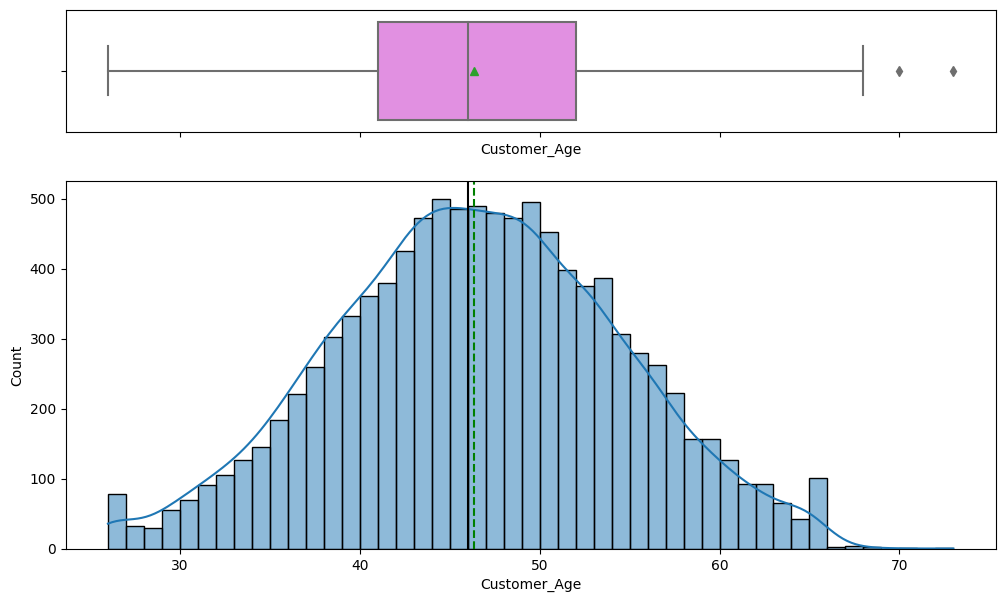

In [ ]:
histogram_boxplot(df1, "Customer_Age", kde=True)

**Observations:**
- Normal distribution centered around 45/46,
- fewer customers in the younger (<30 years) and older (>60 years) age group.

`Months_on_book`

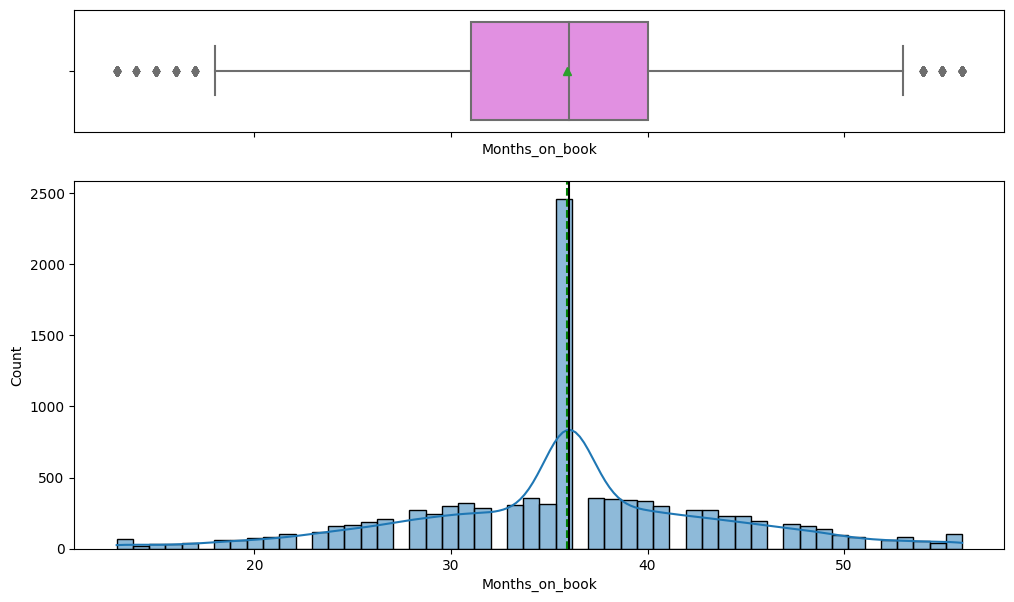

In [ ]:
histogram_boxplot(df1, "Months_on_book", kde=True)

**Observations:**
- Normal distribution with a peak around 36 months.

`Credit_Limit`

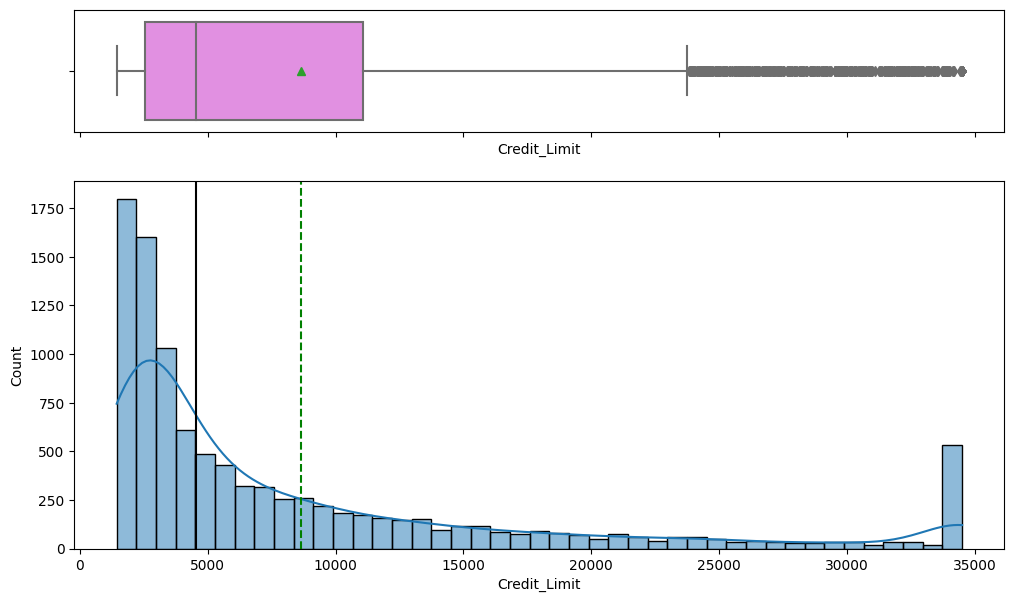

In [ ]:
histogram_boxplot(df1, "Credit_Limit", kde=True)

**Observations:**
- Right-skewed, most customers with lower limits.
- Potential for wide interquartile range and outliers at higher limits.

`Total_Revolving_Bal`

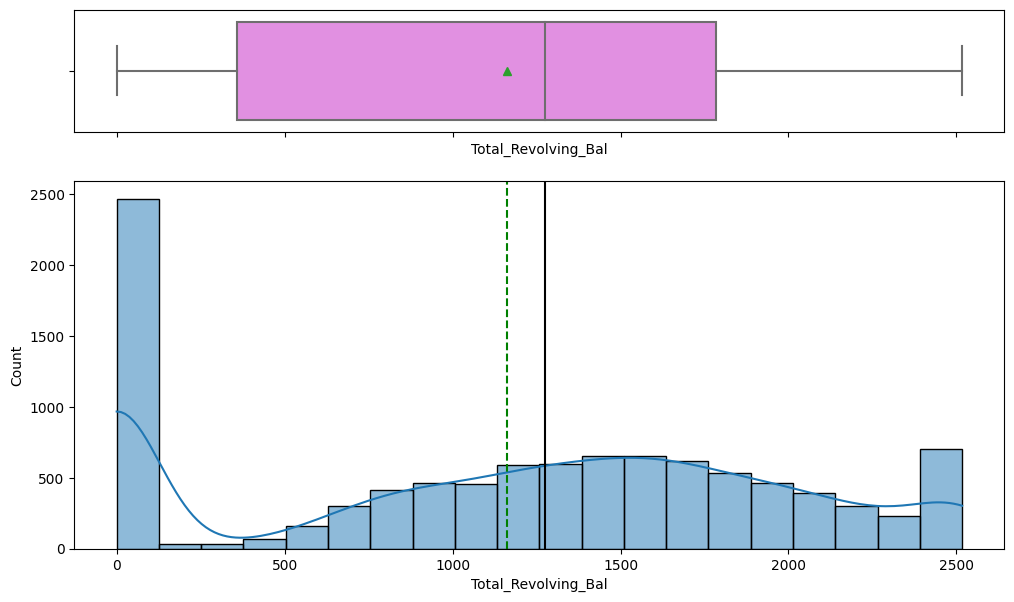

In [ ]:
histogram_boxplot(df1, "Total_Revolving_Bal", kde=True)

**Observations:**
 - A majority of customers have balances lower than the average, but the median is higher than the mean.
 - More customers with lower revolving balances and fewer with very high balances.

`Avg_Open_To_Buy`

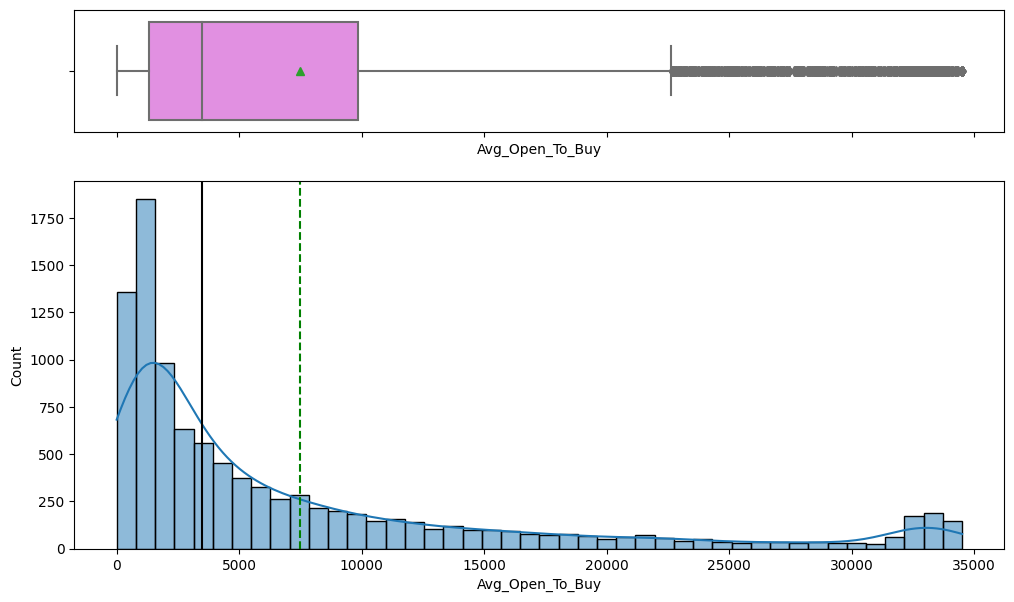

In [ ]:
histogram_boxplot(df1, "Avg_Open_To_Buy", kde=True)

**Observations:**
- The placement of the median closer to the lower quartile and the potential for a longer upper whisker would visually suggest right skewness in the data.
- A higher concentration of values is likely near the lower end due to the skewness.
- The range from 0 to 34,500 indicates a wide variation in the average open-to-buy among customers.

`Total_Trans_Ct`

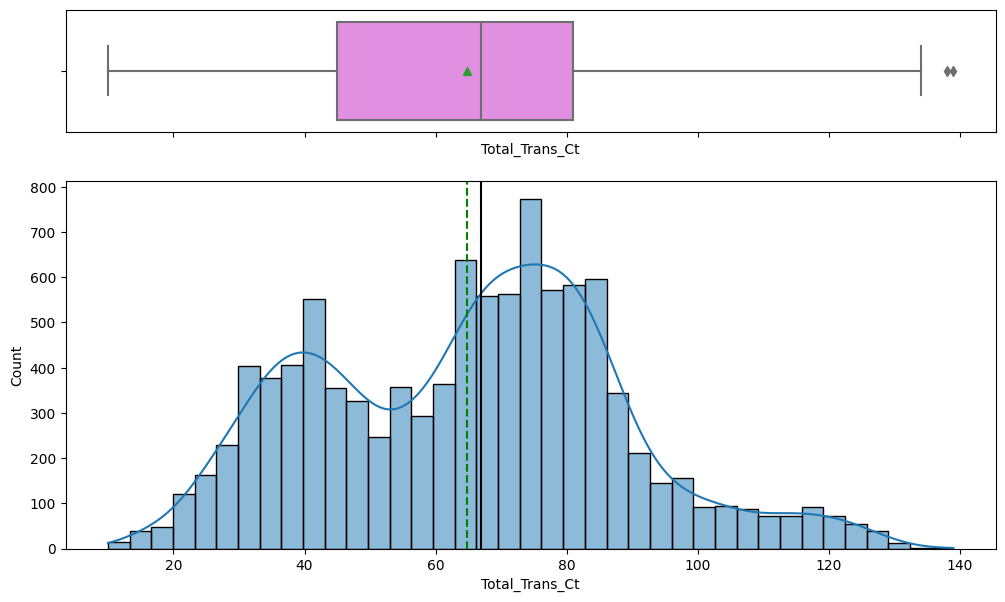

In [ ]:
histogram_boxplot(df1, "Total_Trans_Ct", kde=True)

**Observations:**
- The boxplot is likely to be fairly symmetrical due to the close alignment of the mean and median
- The histogram will span the entire range from the minimum (10) to the maximum (139) transaction count.
- The higher frequency of values is likely to be found around the median and the third quartile, suggesting that a significant number of customers have transaction counts in this range.

`Total_Amt_Chng_Q4_Q1`

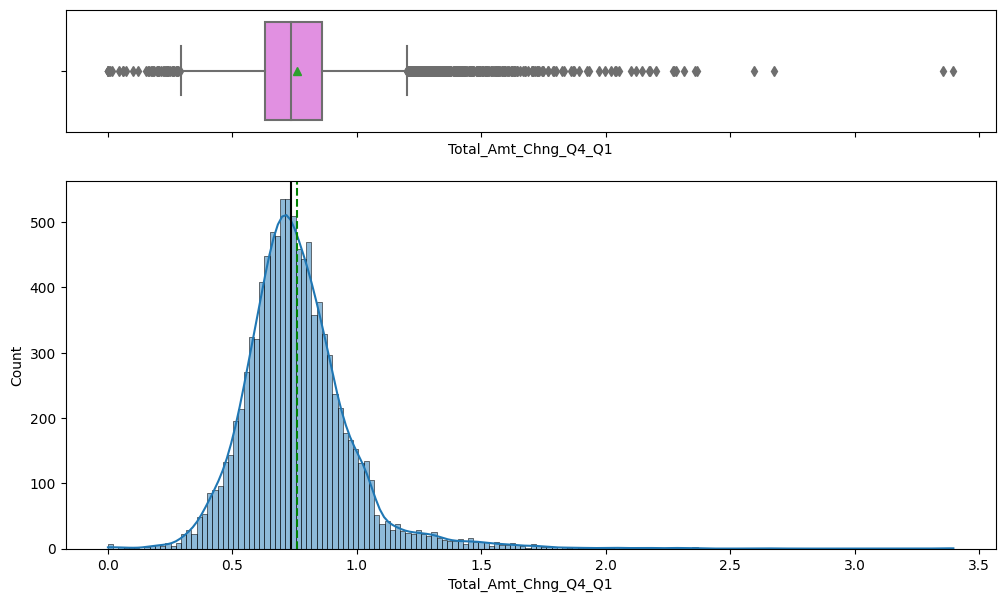

In [ ]:
histogram_boxplot(df1, "Total_Amt_Chng_Q4_Q1", kde=True)

**Observations:**
- The boxplot show a right-skewed distribution.
- The right skew suggests a smaller number of customers with very high changes in transaction amounts.
- The high maximum value, the outliers represent significantly high changes in transaction amounts, indicating a few customers with unusually large increases or decreases in their spending between the quarters.


**Let's see the distribution of the level of income of customers**

**Observation on Income_Category:**

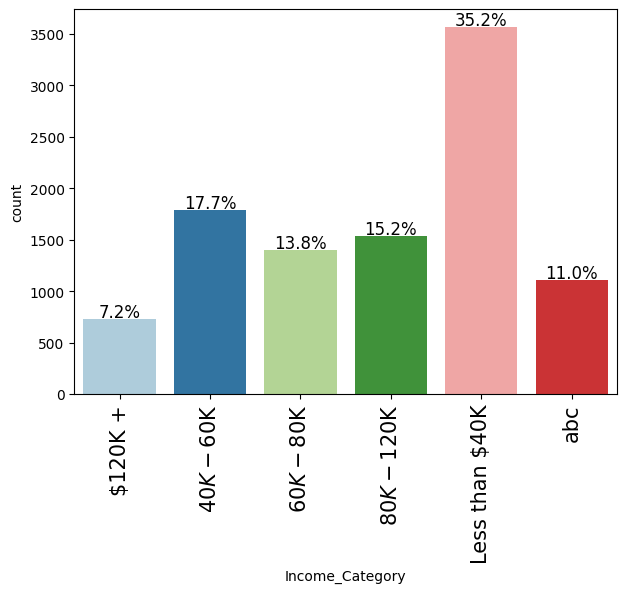

In [ ]:
labeled_barplot(data=df1, feature='Income_Category', perc=True)

**Observations:**
 - **Dominant Lower Income Group:** A significant proportion of customers (35.16%) fall into the 'Less than \$40K' income bracket, indicating a customer base with a considerable portion in the lower income range.
 - **Diverse Income Distribution:** There's a notable spread across various income levels, with each subsequent income category ('\$40K - \$60K', '\$80K - \$120K', '\$60K - \$80K') having a substantial representation.
 - **Data Anomaly:** The 'abc' category, accounting for 10.98%, suggests either a data entry error or a placeholder for unknown/uncategorized incomes, requiring further investigation.

**Observation on Card_Category**

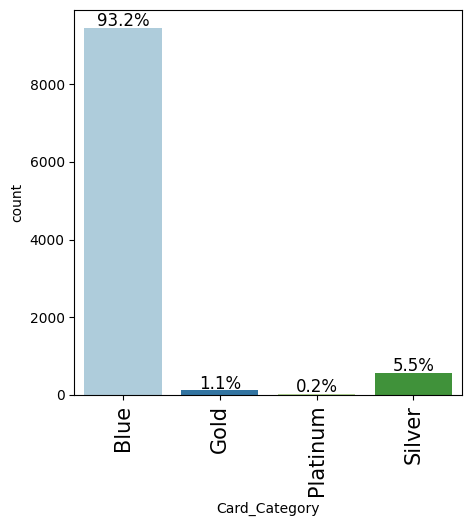

In [ ]:
labeled_barplot(data=df1, feature='Card_Category', perc=True)

**Observations:**
 - **High Preference for Standard Card:** A vast majority of customers (93.18%) use the 'Blue' card, likely a basic or standard offering, suggesting that customers predominantly prefer or qualify for this card type.
 - **Limited Uptake of Premium Cards:** Premium card types like 'Silver', 'Gold', and 'Platinum' have much lower percentages, indicating either a lower eligibility among customers for these cards or less interest in them.

**Observation on Attrition_Flag**

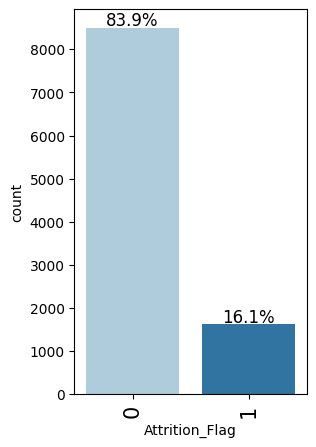

In [ ]:
labeled_barplot(data=df1, feature='Attrition_Flag', perc=True)

**Observations:**
 - **Strong Customer Retention:** The high percentage of existing customers (83.93%) compared to attrited customers (16.07%) suggests good customer retention. This could be indicative of effective customer satisfaction strategies or loyalty programs.
 - **Attrition Rate Insight:** The 16.07% attrition rate, while not insignificant, could provide insights into areas where the business might focus to understand the reasons for customer churn and improve retention strategies.

**Observations:**

- **Income_Category:**
 - **Dominant Lower Income Group:** A significant proportion of customers (35.16%) fall into the 'Less than \$40K' income bracket, indicating a customer base with a considerable portion in the lower income range.
 - **Diverse Income Distribution:** There's a notable spread across various income levels, with each subsequent income category ('\$40K - \$60K', '\$80K - \$120K', '\$60K - \$80K') having a substantial representation.
 - **Data Anomaly:** The 'abc' category, accounting for 10.98%, suggests either a data entry error or a placeholder for unknown/uncategorized incomes, requiring further investigation.

- **Card_Category:**

 - **High Preference for Standard Card:** A vast majority of customers (93.18%) use the 'Blue' card, likely a basic or standard offering, suggesting that customers predominantly prefer or qualify for this card type.
 - **Limited Uptake of Premium Cards:** Premium card types like 'Silver', 'Gold', and 'Platinum' have much lower percentages, indicating either a lower eligibility among customers for these cards or less interest in them.

- **Attrition_Flag:**

 - **Strong Customer Retention:** The high percentage of existing customers (83.93%) compared to attrited customers (16.07%) suggests good customer retention. This could be indicative of effective customer satisfaction strategies or loyalty programs.
 - **Attrition Rate Insight:** The 16.07% attrition rate, while not insignificant, could provide insights into areas where the business might focus to understand the reasons for customer churn and improve retention strategies.

### Bivariate Distributions

**Let's see the attributes that have a strong correlation with each other**

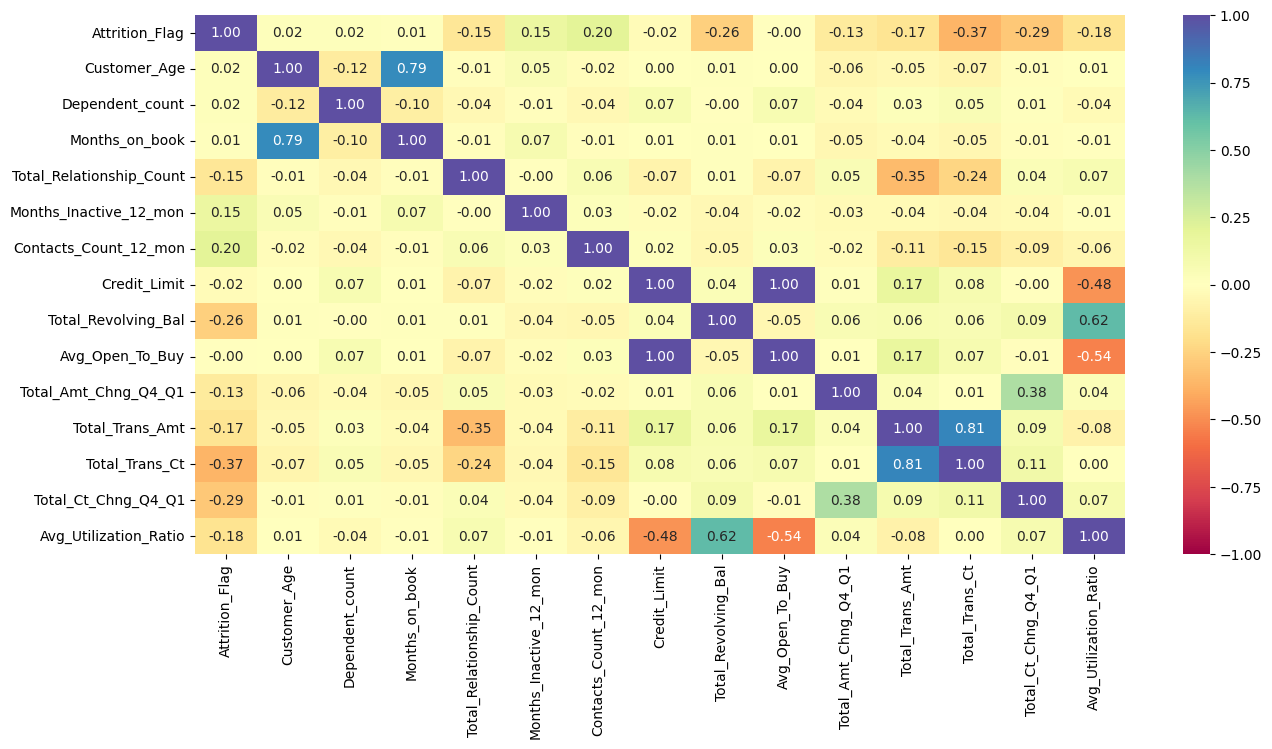

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations:**

- **Attrition_Flag:** Higher likelihood of attrition correlates with more contacts with the bank and longer periods of inactivity. Customers with higher revolving balances and transaction counts are less likely to leave.

- **Customer_Age:** Older customers tend to have longer relationships with the bank but might have fewer dependents.

- **Credit_Limit and Avg_Open_To_Buy:** These are highly correlated, indicating that available credit is closely tied to the total credit limit. we can drrop Avg_Open_To_Buy col

- **Total_Revolving_Bal and Avg_Utilization_Ratio:** A strong positive correlation suggests that higher revolving balances are associated with higher utilization ratios.

- **Total_Trans_Amt and Total_Trans_Ct:** A very strong correlation indicates that an increase in transaction counts is generally accompanied by an increase in total transaction amounts. We can drop on of the col from them.

- **Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1:** A moderate correlation implies some relationship between changes in transaction amounts and counts across quarters.

- **General Trends:** Some variables show low correlation with others, indicating independent aspects of customer behavior. Also, higher credit limits are generally associated with lower utilization ratios.

`Check relationship between Attrition_Flag vs some other categorical cols`

In [ ]:
categorical_columns = ['Gender','Marital_Status','Education_Level','Income_Category','Contacts_Count_12_mon','Months_Inactive_12_mon','Total_Relationship_Count','Dependent_count']

+--------------------------+
| Gender vs Attrition_Flag |
+--------------------------+
Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769


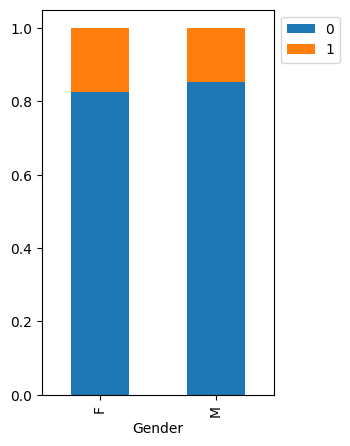

------------------------------------------------------------------------------------------------------------------------
+----------------------------------+
| Marital_Status vs Attrition_Flag |
+----------------------------------+
Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748


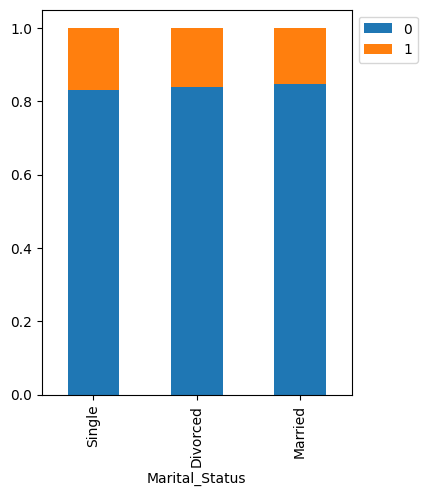

------------------------------------------------------------------------------------------------------------------------
+-----------------------------------+
| Education_Level vs Attrition_Flag |
+-----------------------------------+
Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516


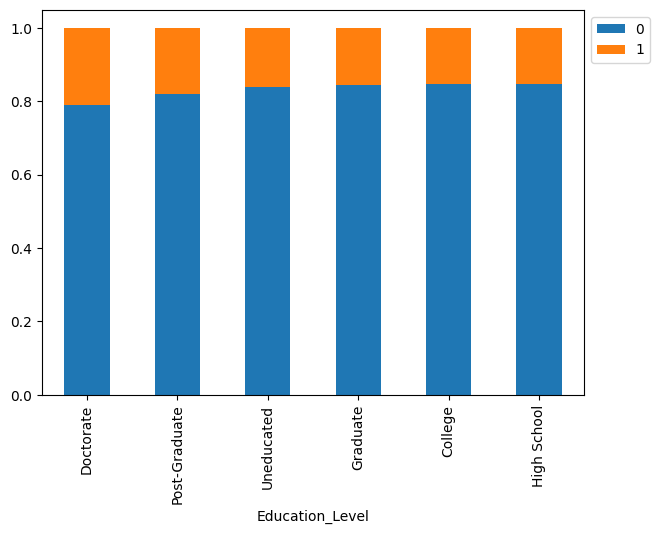

------------------------------------------------------------------------------------------------------------------------
+-----------------------------------+
| Income_Category vs Attrition_Flag |
+-----------------------------------+
Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727


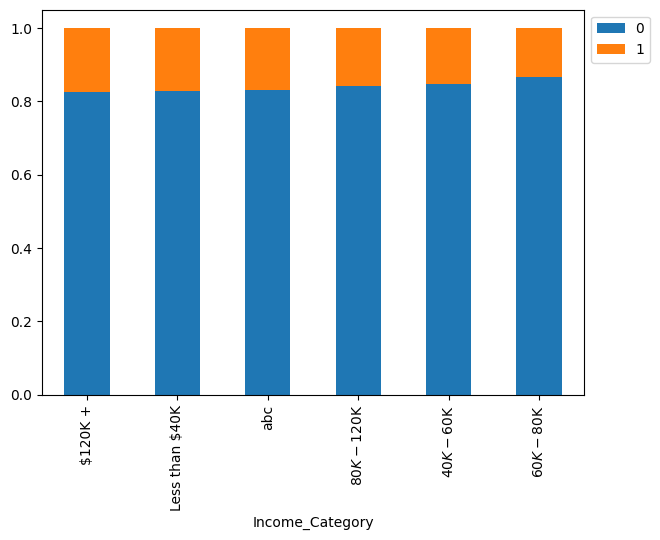

------------------------------------------------------------------------------------------------------------------------
+-----------------------------------------+
| Contacts_Count_12_mon vs Attrition_Flag |
+-----------------------------------------+
Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399


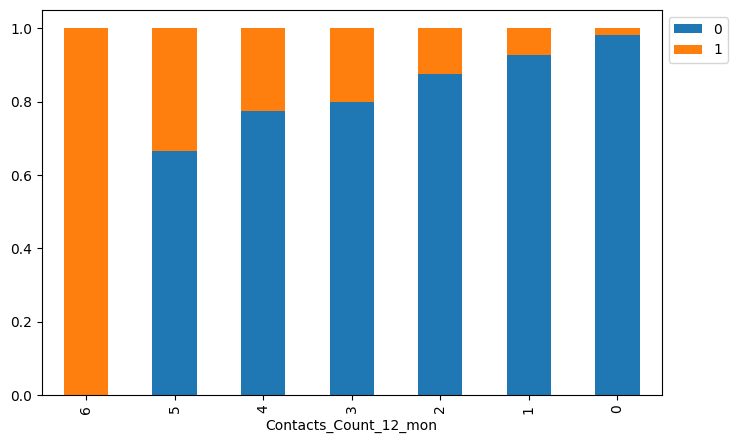

------------------------------------------------------------------------------------------------------------------------
+------------------------------------------+
| Months_Inactive_12_mon vs Attrition_Flag |
+------------------------------------------+
Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29


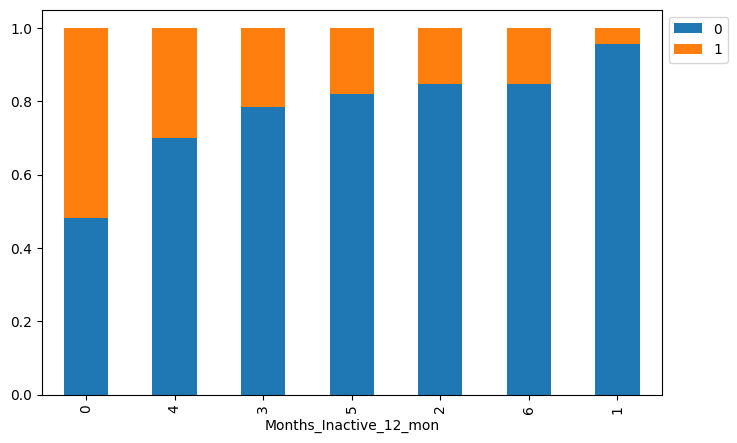

------------------------------------------------------------------------------------------------------------------------
+--------------------------------------------+
| Total_Relationship_Count vs Attrition_Flag |
+--------------------------------------------+
Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866


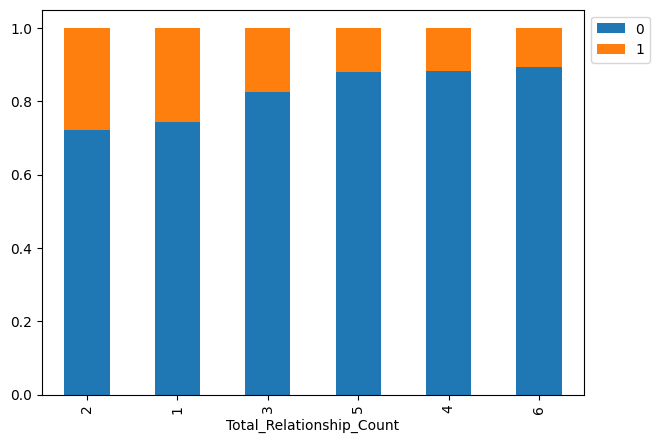

------------------------------------------------------------------------------------------------------------------------
+-----------------------------------+
| Dependent_count vs Attrition_Flag |
+-----------------------------------+
Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424


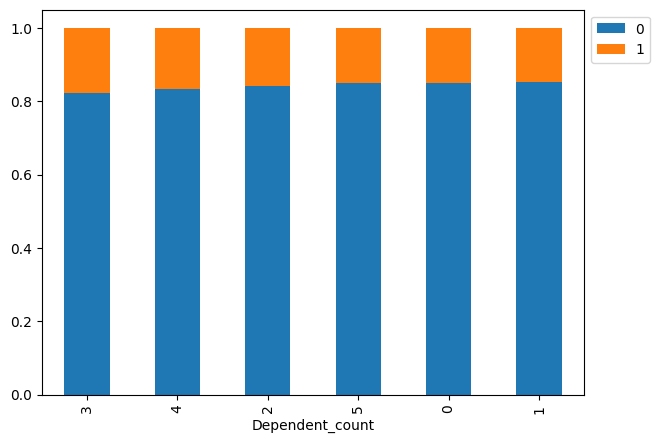

------------------------------------------------------------------------------------------------------------------------


In [ ]:
BOLD = '\033[1m'
END = '\033[0m'
for column in categorical_columns:
  header = column+' vs Attrition_Flag'
  top_border = "+" + "-" * (len(header) + 2) + "+"
  # Print the box with bold text
  print(top_border)
  print("| " + BOLD + header + END + " |")
  print(top_border)
  stacked_barplot(df1, column, "Attrition_Flag")

**Observations:**

**Gender:**
 - Female customers have a slightly higher attrition rate compared to male customers.

**Marital Status:**
 - Married customers have a slightly lower attrition rate than single or divorced customers, but the differences are not very pronounced.

**Education Level:**
 - Customers with a graduate education level have a lower attrition rate compared to those with other education levels.
 - Customers with doctorate and post-graduate degrees, despite being fewer in number, show relatively higher attrition rates.

**Income Category:**
 - The attrition rate is higher in the 'Less than $40K' income category compared to other income brackets.

**Contacts Count:**
 - A higher number of contacts with the bank correlates with a higher attrition rate, particularly for customers with 4 or more contacts in the last 12 months.

**Months Inactive:**
 - Longer periods of inactivity are associated with higher attrition rates, indicating that engaging customers regularly may be key to retention.

**Total Relationship Count:**
 - Customers with fewer products (1 or 2) tend to have higher attrition rates. This suggests that customers who use more of the bank’s products are more likely to stay.

**Dependent Count:**
 - Customers with more dependents (4 or 5) tend to have slightly higher attrition rates compared to those with fewer or no dependents.

`Check relationship between Attrition_Flag vs some other numerical cols`

In [ ]:
numerical_cols = ['Total_Revolving_Bal','Credit_Limit','Customer_Age','Total_Trans_Ct',
                  'Total_Trans_Amt','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Months_on_book','Avg_Open_To_Buy']

+---------------------------------------+
| Total_Revolving_Bal vs Attrition_Flag |
+---------------------------------------+


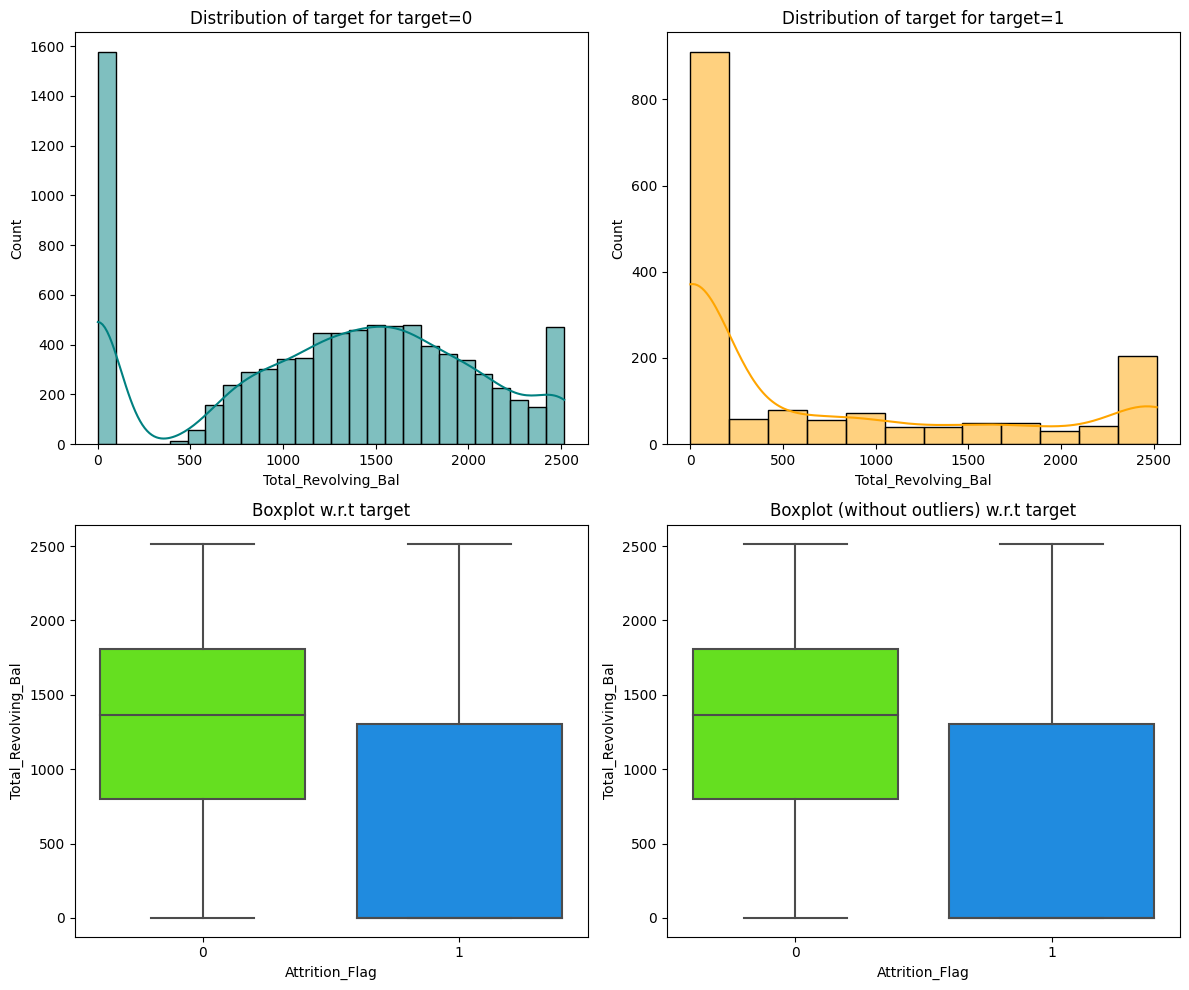

--------------------------------------------------------------------------------------------------------------------------------------------
+--------------------------------+
| Credit_Limit vs Attrition_Flag |
+--------------------------------+


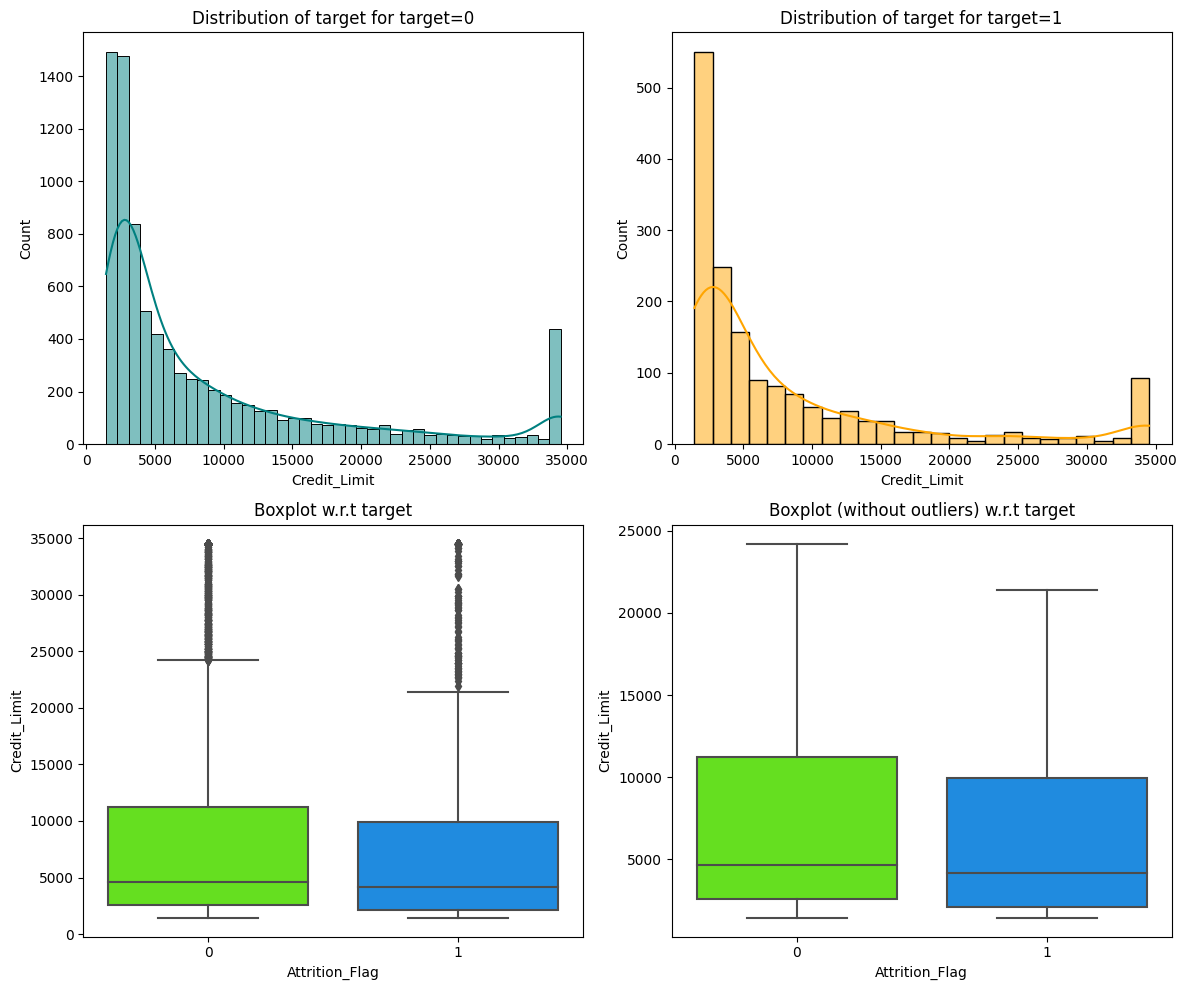

--------------------------------------------------------------------------------------------------------------------------------------------
+--------------------------------+
| Customer_Age vs Attrition_Flag |
+--------------------------------+


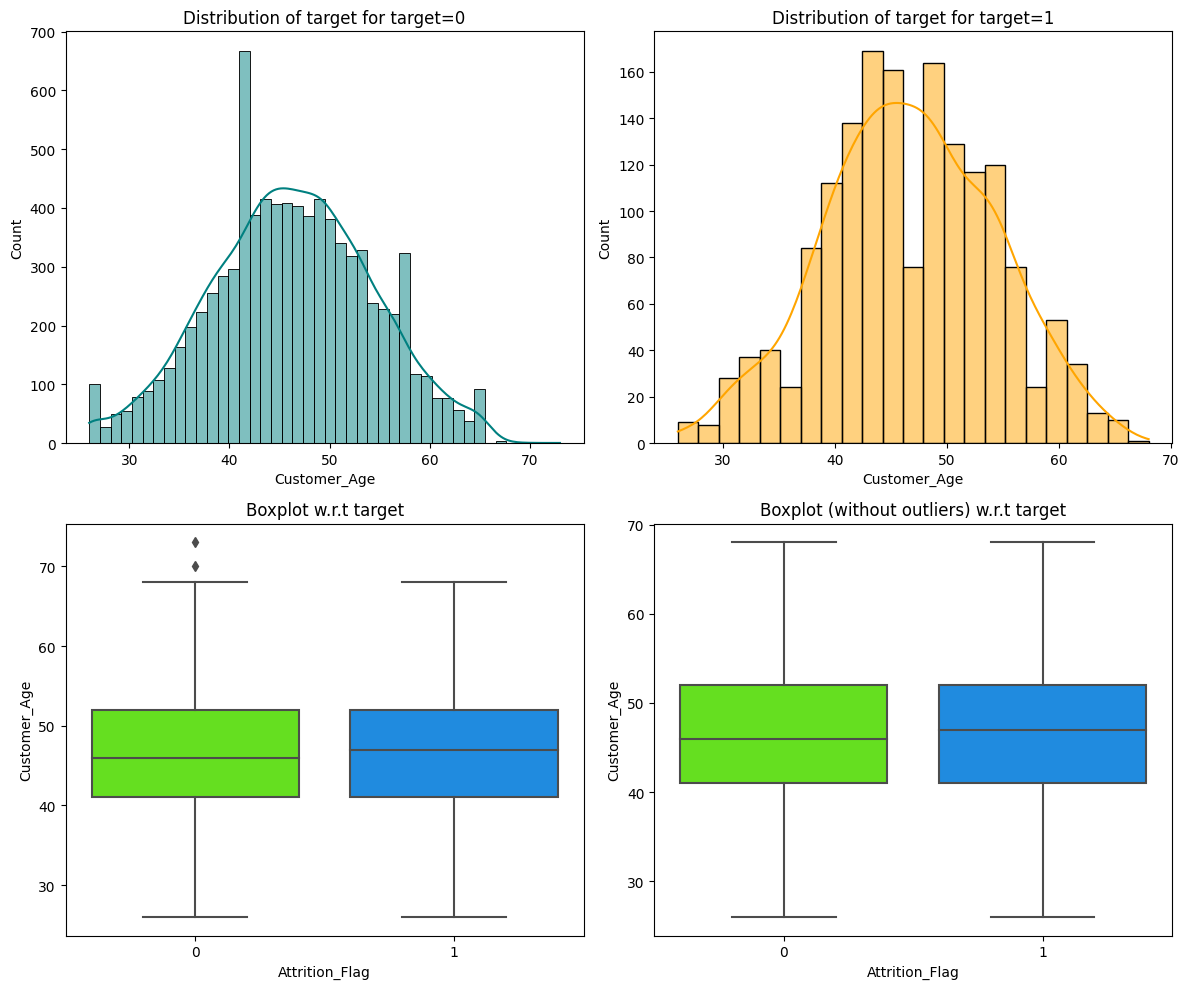

--------------------------------------------------------------------------------------------------------------------------------------------
+----------------------------------+
| Total_Trans_Ct vs Attrition_Flag |
+----------------------------------+


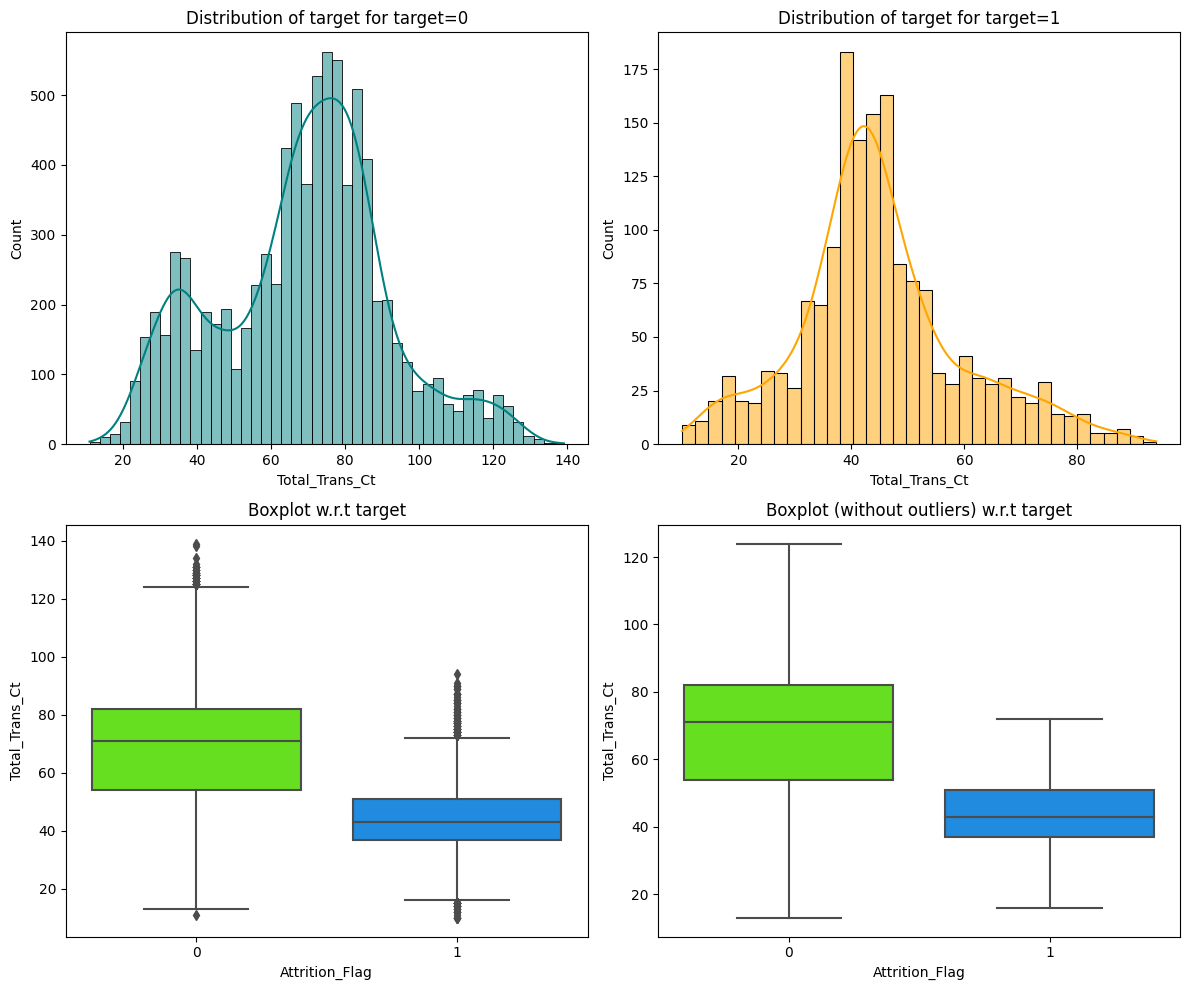

--------------------------------------------------------------------------------------------------------------------------------------------
+-----------------------------------+
| Total_Trans_Amt vs Attrition_Flag |
+-----------------------------------+


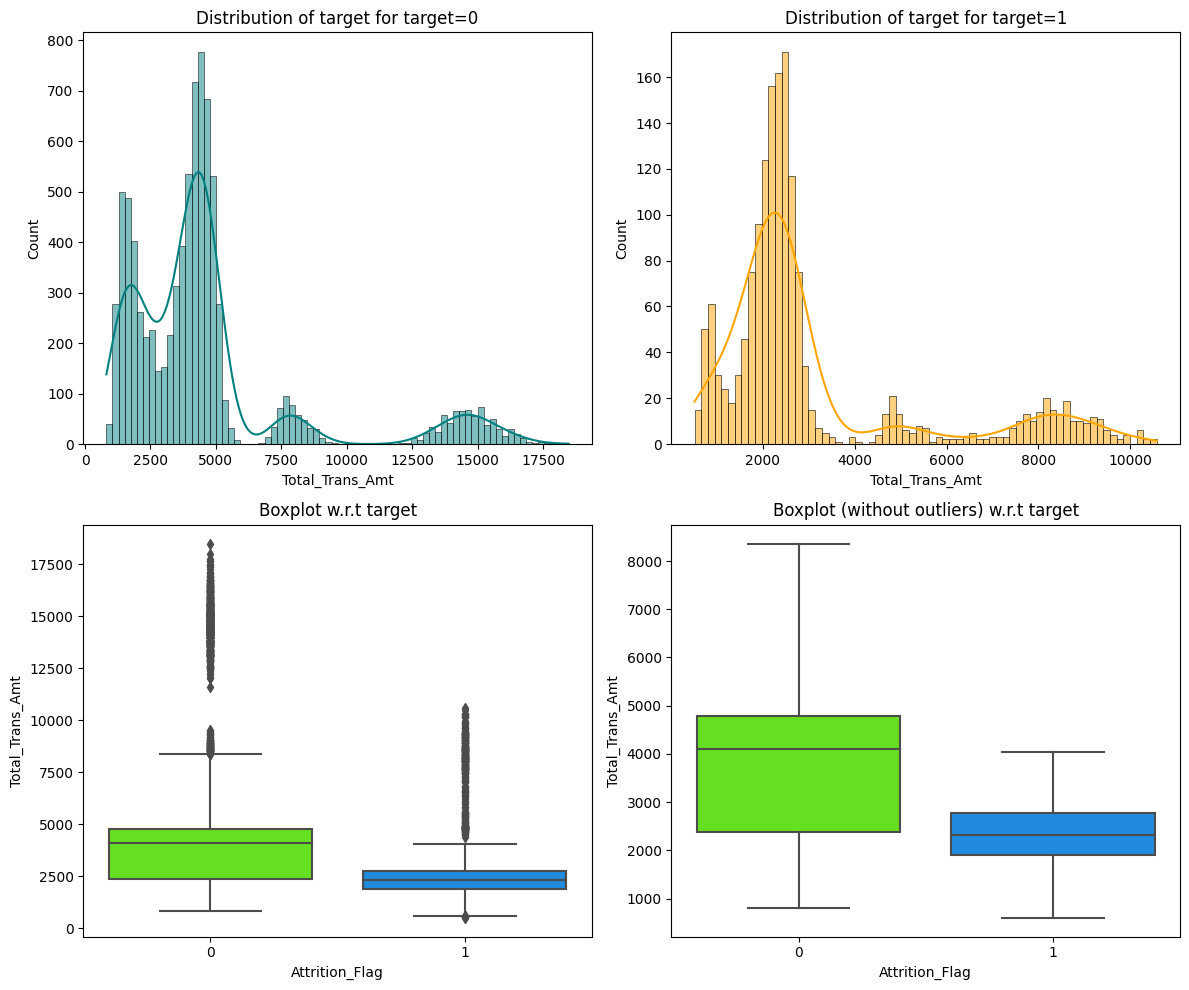

--------------------------------------------------------------------------------------------------------------------------------------------
+---------------------------------------+
| Total_Ct_Chng_Q4_Q1 vs Attrition_Flag |
+---------------------------------------+


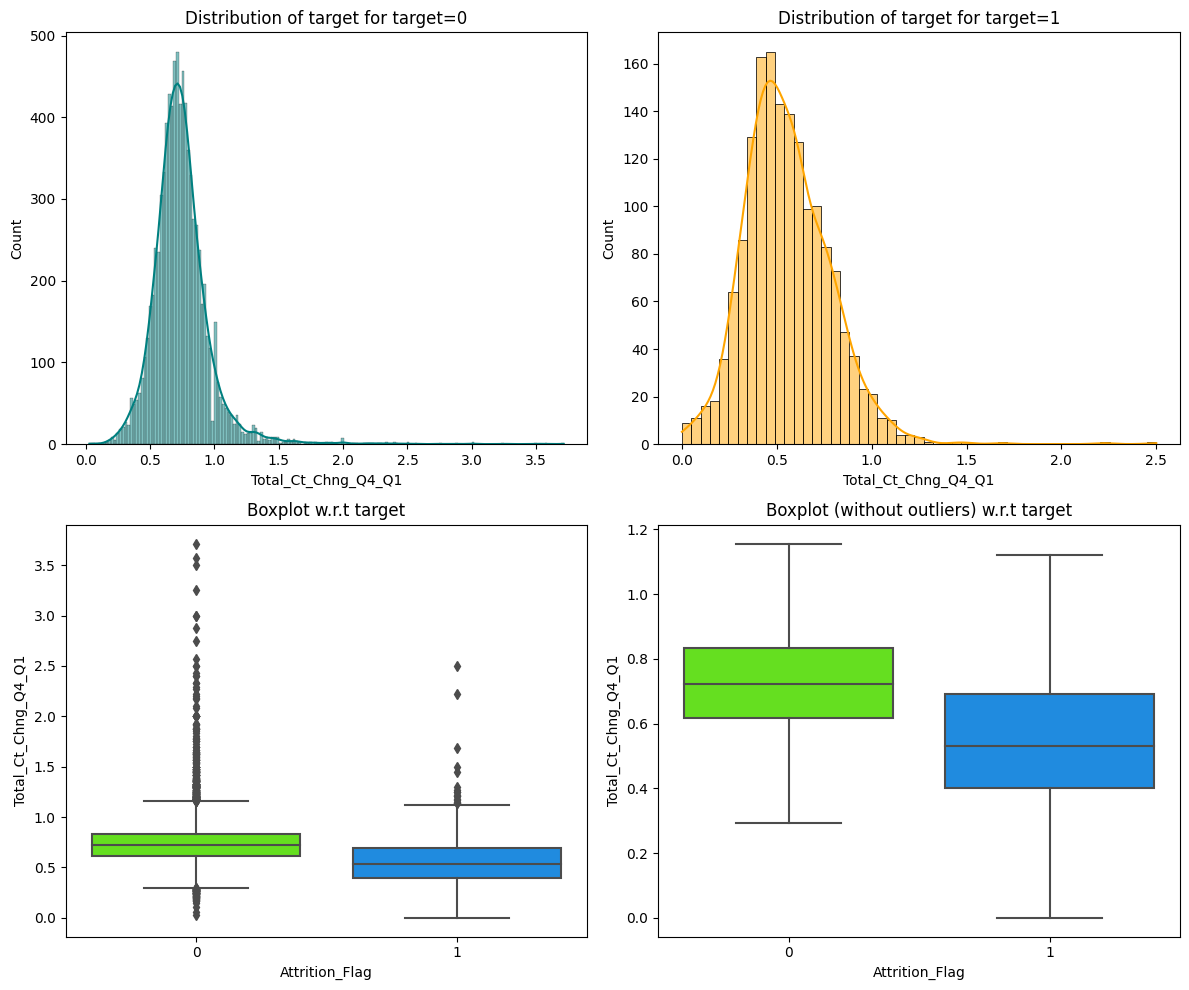

--------------------------------------------------------------------------------------------------------------------------------------------
+-----------------------------------------+
| Avg_Utilization_Ratio vs Attrition_Flag |
+-----------------------------------------+


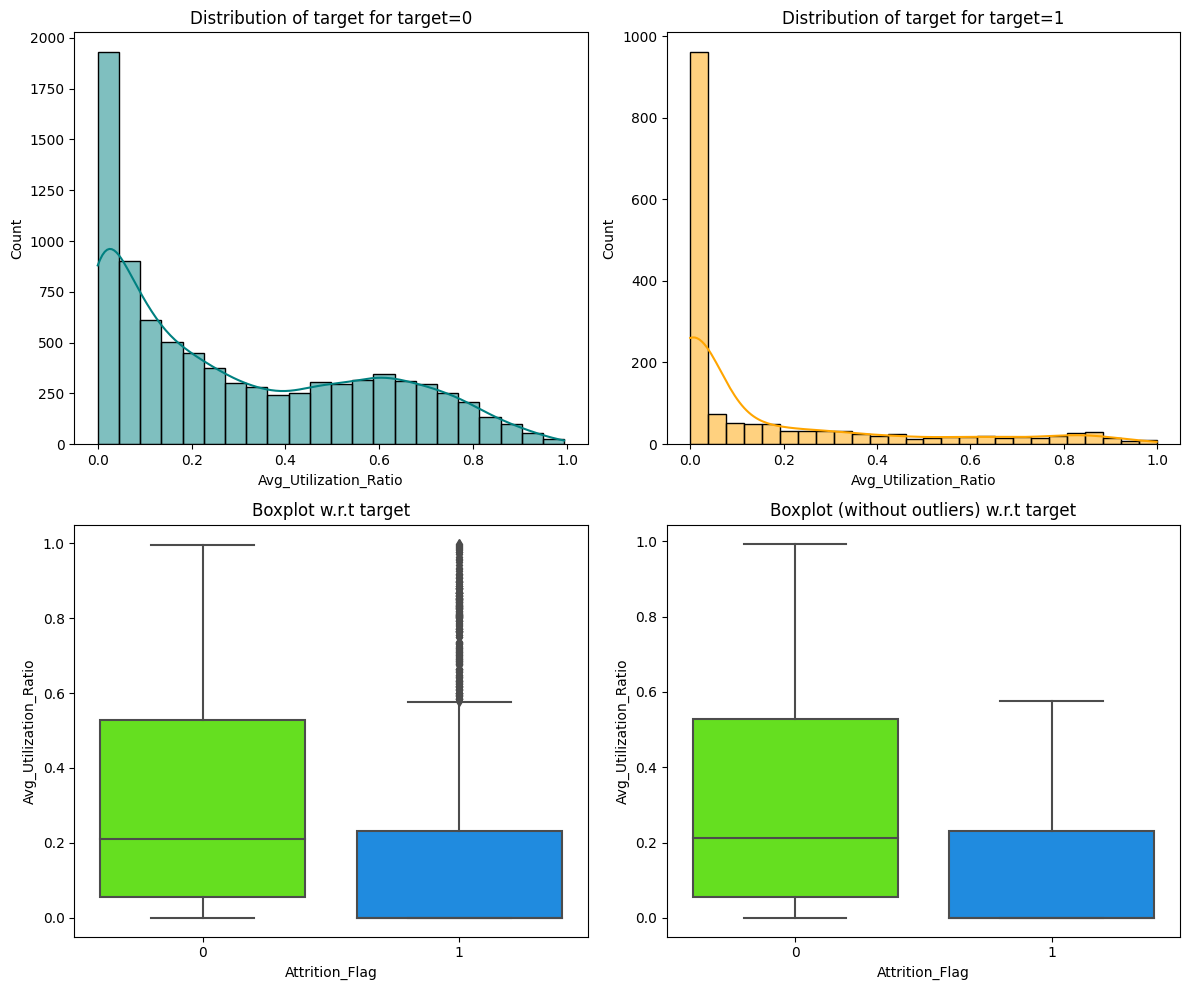

--------------------------------------------------------------------------------------------------------------------------------------------
+----------------------------------+
| Months_on_book vs Attrition_Flag |
+----------------------------------+


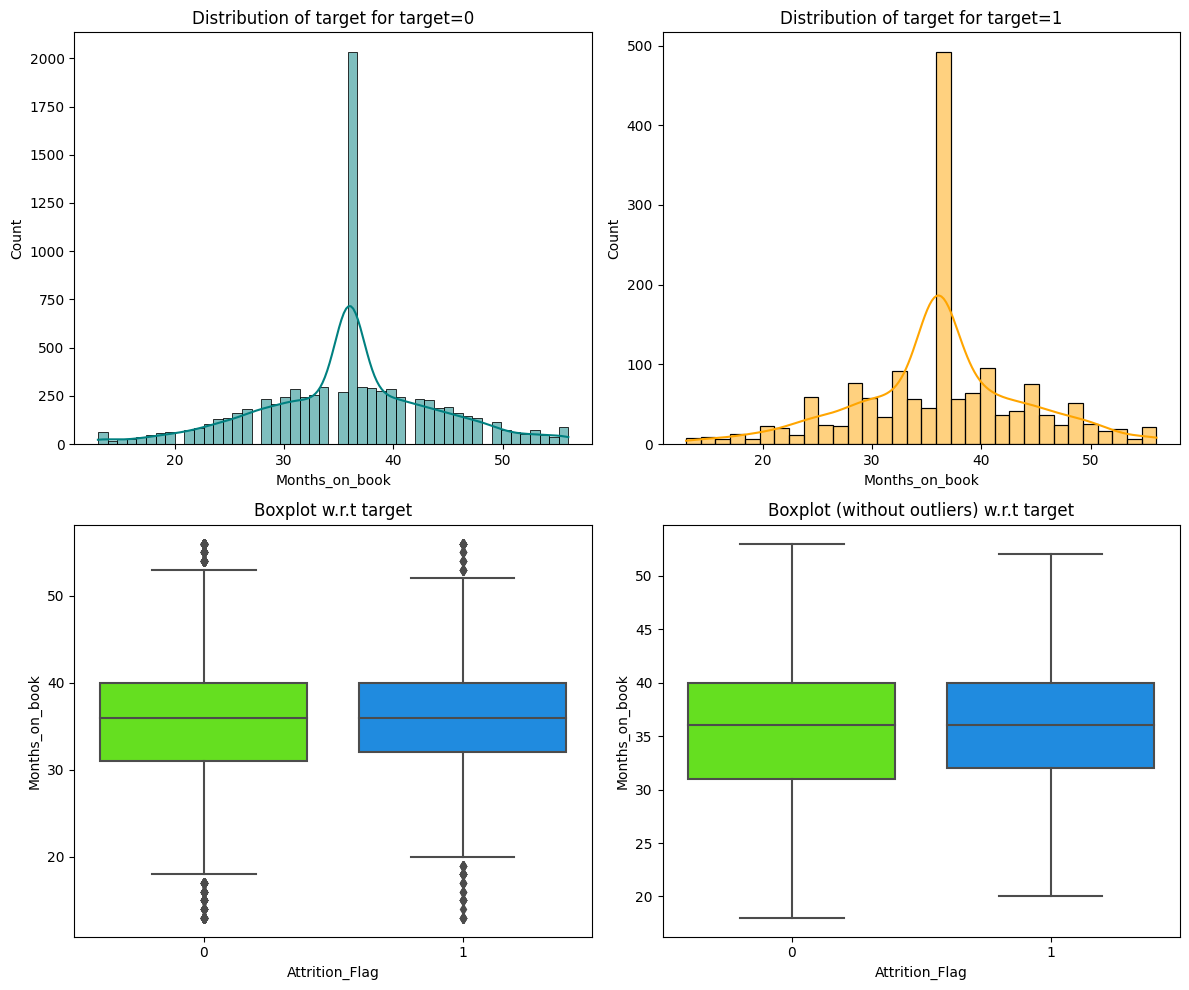

--------------------------------------------------------------------------------------------------------------------------------------------
+-----------------------------------+
| Avg_Open_To_Buy vs Attrition_Flag |
+-----------------------------------+


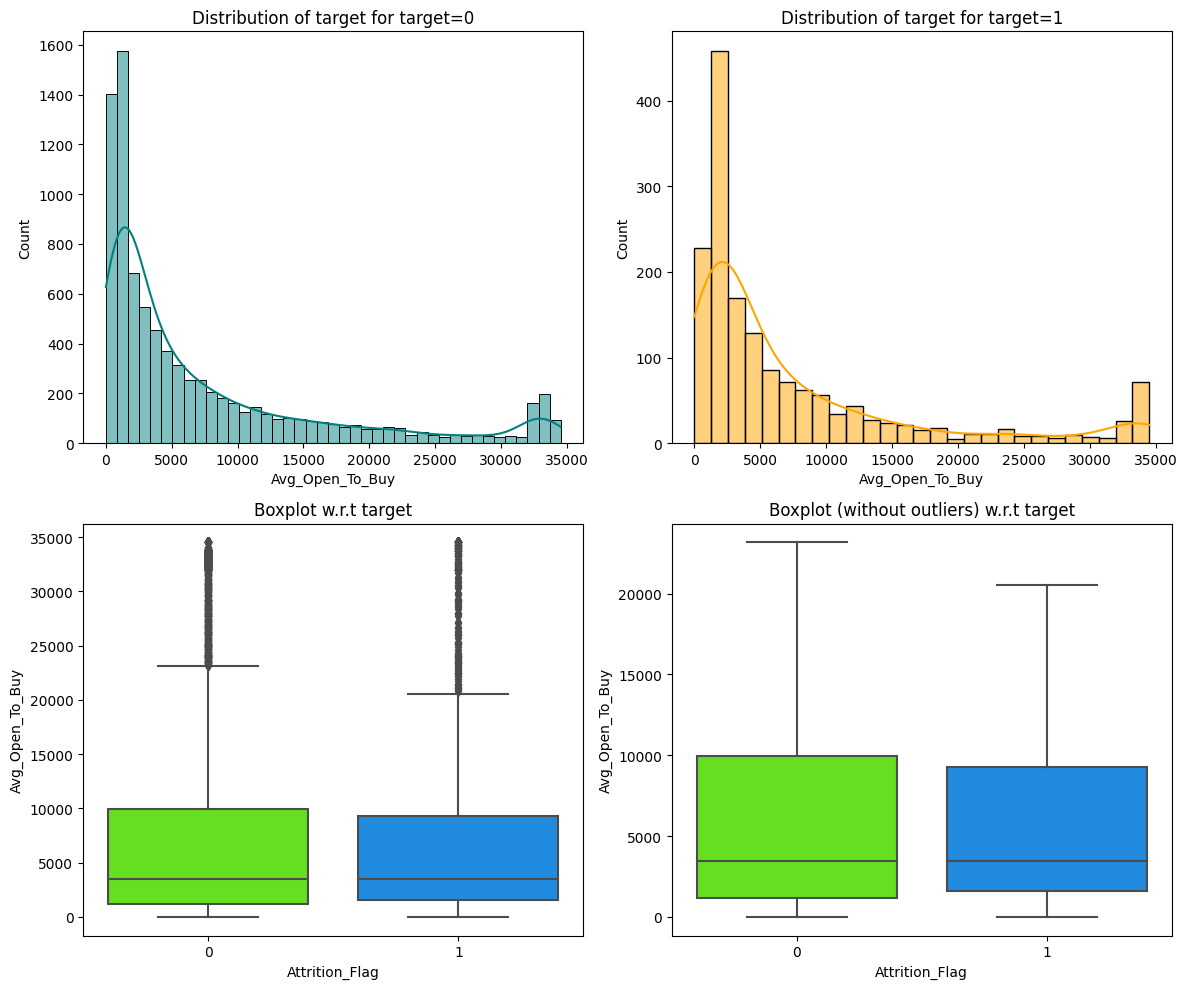

--------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
BOLD = '\033[1m'
END = '\033[0m'
for column in numerical_cols:
  header = column+' vs Attrition_Flag'
  top_border = "+" + "-" * (len(header) + 2) + "+"
  # Print the box with bold text
  print(top_border)
  print("| " + BOLD + header + END + " |")
  print(top_border)
  distribution_plot_wrt_target(df1, column, "Attrition_Flag")
  print('-'*140)

**Observations:**
- **Total_Revolving_Bal vs Attrition_Flag`**

 - Attrited Customers have lower revolving balances (0 to 1200), suggesting possible financial constraints or dissatisfaction.
 - Existing Customers show higher revolving balances (750 to 1800), indicating stronger financial engagement and possibly greater satisfaction with the services.
 - There's a clear segmentation between the two groups based on these ranges, which could be leveraged for targeted customer retention strategies.

- **Credit_Limit vs Attrition_Flag**
 - Existing customers generally have higher credit limits. This suggests that they might be more trusted or creditworthy in the eyes of the institution, possibly due to a history of responsible credit usage.
 - Attrited customers have lower credit limits. This could indicate either a lower initial creditworthiness or a decrease in credit limit prior to attrition, possibly due to factors like reduced usage or increased risk.
 - There is some overlap in the credit limit ranges of the two groups. This overlap might represent a transitional segment of customers who are at risk of attrition.

- **Customer_Age vs Attrition_Flag**
 - The observation suggests that there isn't a significant influence of customer age on whether they are existing or attrited customers. Customer_Age col can be dropped

- **Total_Trans_Ct vs Attrition_Flag**
 - They typically have higher transaction counts. This suggests active account usage and engagement with the financial institution's services.

 - These customers have lower transaction counts. This could indicate lesser engagement or decreasing usage, potentially preceding the decision to leave the institution.

- **Total_Trans_Amt vs Attrition_Flag**
  - They generally have higher total transaction amounts. This indicates a stronger financial engagement with the institution's services.

 - These customers show lower transaction amounts, suggesting reduced spending or transaction activity, which could be a precursor to attrition.

- **Total_Ct_Chng_Q4_Q1 vs Attrition_Flag**
 - They typically exhibit a higher change in transaction count between Q4 and Q1. This suggests a stable or increasing transaction frequency, possibly indicating customer satisfaction and engagement.

 - These customers show a lower change in transaction count in the same period. This could be indicative of declining engagement and satisfaction, potentially leading to attrition.

- **Avg_Utilization_Ratio vs Attrition_Flag**
 - They tend to have a wider and higher range of average utilization ratios. This suggests a moderate to good use of their available credit, indicating active and potentially responsible credit management.

 - These customers exhibit a lower range of utilization ratios. This lower utilization could reflect underuse of credit facilities, which might be associated with reduced engagement with the financial institution or dissatisfaction with credit products.

- **Months_on_book vs Attrition_Flag**
 - The observation indicates that the number of months on book does not significantly affect whether customers are classified as existing or attrited. Months_on_book can be dropped.

- **Avg_Open_To_Buy vs Attrition_Flag**
 - Both existing and attrited customers have similar profiles in terms of their average available credit over a year. This similarity indicates that the 'Avg_Open_To_Buy' by itself may not be a decisive factor in differentiating between customers who stay and those who leave.

## Data Pre-processing

### Checking for Anomalous Values

In [ ]:
for i in df.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
**************************************************
Unique values in Card_Category are :
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
************************************

In [ ]:
data1= df1.copy()

In [ ]:
education_mapping = {"Uneducated": 1,"High School": 2, "College": 3, "Graduate": 4, "Post-Graduate": 5, "Doctorate": 6}
data1["Education_Level"] = data1["Education_Level"].map(education_mapping)

In [ ]:
gender_mapping = {"F" :1, "M": 2}
data1["Gender"] = data1["Gender"].map(gender_mapping)

In [ ]:
marital_status_mapping = {"Married": 1, "Single": 2 , "Divorced": 3}
data1["Marital_Status"] = data1["Marital_Status"].map(marital_status_mapping)

In [ ]:
income_category_mapping = {"Less than $40K": 1,"$40K - $60K": 2, "$60K - $80K": 3, "$80K - $120K": 4, "$120K +": 5}
data1["Income_Category"] = data1["Income_Category"].map(income_category_mapping)

In [ ]:
Card_Category_mapping = {"Blue": 1,"Silver": 2,"Gold": 3,"Platinum": 4}
data1["Card_Category"] = data1["Card_Category"].map(Card_Category_mapping)

### Outlier Detection

In [ ]:
Q1 = data1.quantile(0.25)  # To find the 25th percentile
Q3 = data1.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [ ]:
numeric_columns = df1.select_dtypes(include=["float64", "int64"])
percentage_outliers = (
    ((numeric_columns < lower) | (numeric_columns > upper)).sum() / len(df) * 100
)
print(percentage_outliers)

Attrition_Flag             16.066
Avg_Open_To_Buy             9.509
Avg_Utilization_Ratio       0.000
Card_Category               0.000
Contacts_Count_12_mon       6.211
Credit_Limit                9.717
Customer_Age                0.020
Dependent_count             0.000
Education_Level             0.000
Gender                      0.000
Income_Category             0.000
Marital_Status              0.000
Months_Inactive_12_mon      3.268
Months_on_book              3.812
Total_Amt_Chng_Q4_Q1        3.910
Total_Ct_Chng_Q4_Q1         3.891
Total_Relationship_Count    0.000
Total_Revolving_Bal         0.000
Total_Trans_Amt             8.848
Total_Trans_Ct              0.020
dtype: float64


**Observations:**
- 'Customer_Age' and 'Total_Trans_Ct' show very low outlier percentages (0.020%), suggesting that almost all the data points in these fields fall within an expected range.
-  Fields such as 'Months_on_book' (3.812%), 'Months_Inactive_12_mon' (3.268%), 'Total_Amt_Chng_Q4_Q1' (3.910%), and 'Total_Ct_Chng_Q4_Q1' (3.891%) have moderate outlier percentages. This indicates some data points significantly differ from the rest, which could be due to exceptional cases or data entry errors.
- Contacts_Count_12_mon' (6.211%), 'Credit_Limit' (9.717%), 'Avg_Open_To_Buy' (9.509%), and 'Total_Trans_Amt' (8.848%) have higher percentages of outliers. This suggests variability and potential extreme values in these areas, which could be significant for understanding customer behavior, credit usage, and interaction patterns.

**Data Preparation for Modeling**

In [ ]:
# Separate independent and dependent variable
# Excluding the Customer_Age,Months_on_book,Avg_Open_To_Buy and Total_Trans_Ct  columns as they have minimal impact on the 'Attrition_Flag' variable.
X = data1.drop(["Attrition_Flag", "Customer_Age","Months_on_book","Avg_Open_To_Buy","Total_Trans_Ct"], axis=1)
Y = data1["Attrition_Flag"]

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, Y_temp, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

# then we split the temporary set into train and validation

X_train, X_val, Y_train, Y_val = train_test_split(
    X_temp, Y_temp, test_size=0.25, random_state=1, stratify=Y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 15) (2026, 15) (2026, 15)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


## Missing value imputation




In [ ]:
data1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,2,3,2.000,1.000,3.000,1,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,0,49,1,5,4.000,2.000,1.000,1,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,0,51,2,3,4.000,1.000,4.000,1,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,0,40,1,4,2.000,NaN,1.000,1,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,0,40,2,3,1.000,1.000,3.000,1,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
data1.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

# Get list of categorical and numerical columns
cat_cols = list(X_train.select_dtypes(include='object').columns)
num_cols = list(X_train.select_dtypes(include=['int', 'float']).columns)
if cat_cols:
  # Impute categorical columns
  cat_imputer = SimpleImputer(strategy='most_frequent')
  X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
  X_val[cat_cols] = cat_imputer.transform(X_val[cat_cols])
  X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

# Impute numerical columns
num_imputer = SimpleImputer(strategy='mean')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_val[num_cols] = num_imputer.transform(X_val[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

In [ ]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Gender      

**Reverse Mapping for Encoded Variables**

In [ ]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [ ]:
inverse_mapping(gender_mapping, "Gender")
inverse_mapping(education_mapping, "Education_Level")
inverse_mapping(marital_status_mapping, "Marital_Status")
inverse_mapping(income_category_mapping, "Income_Category")
inverse_mapping(Card_Category_mapping, "Card_Category")

**Train Dataset**

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3193
M    2882
Name: Gender, dtype: int64
******************************
Graduate         1854
College          1546
High School      1228
Uneducated        881
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64
******************************
Single      2826
Married     2819
Divorced     430
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2129
$40K - $60K       1713
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: Income_Category, dtype: int64
******************************
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: Card_Category, dtype: int64
******************************


**Validation Dataset**

In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    1095
M     931
Name: Gender, dtype: int64
******************************
Graduate         623
College          493
High School      404
Uneducated       306
Post-Graduate    101
Doctorate         99
Name: Education_Level, dtype: int64
******************************
Married     960
Single      910
Divorced    156
Name: Marital_Status, dtype: int64
******************************
Less than $40K    736
$40K - $60K       582
$80K - $120K      293
$60K - $80K       279
$120K +           136
Name: Income_Category, dtype: int64
******************************
Blue        1905
Silver        97
Gold          21
Platinum       3
Name: Card_Category, dtype: int64
******************************


**Test Dataset**

In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

F    1070
M     956
Name: Gender, dtype: int64
******************************
Graduate         651
College          493
High School      381
Uneducated       300
Post-Graduate    103
Doctorate         98
Name: Education_Level, dtype: int64
******************************
Single      956
Married     908
Divorced    162
Name: Marital_Status, dtype: int64
******************************
Less than $40K    696
$40K - $60K       607
$60K - $80K       292
$80K - $120K      289
$120K +           142
Name: Income_Category, dtype: int64
******************************
Blue        1876
Silver       119
Gold          26
Platinum       5
Name: Card_Category, dtype: int64
******************************


**Creating Dummy Variables**

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 25) (2026, 25) (2026, 25)


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

Sample code for model building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, Y_train)
    scores = recall_score(Y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, Y_train)
    scores_val = recall_score(Y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9764344262295082
Random forest: 1.0
GBM: 0.8114754098360656
Adaboost: 0.7469262295081968
dtree: 1.0

Validation Performance:

Bagging: 0.754601226993865
Random forest: 0.7024539877300614
GBM: 0.8098159509202454
Adaboost: 0.754601226993865
dtree: 0.7361963190184049


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, Y_train)
    scores_train = recall_score(Y_train, model.predict(X_train))
    scores_val = recall_score(Y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9764, Validation Score: 0.7546, Difference: 0.2218
Random forest: Training Score: 1.0000, Validation Score: 0.7025, Difference: 0.2975
GBM: Training Score: 0.8115, Validation Score: 0.8098, Difference: 0.0017
Adaboost: Training Score: 0.7469, Validation Score: 0.7546, Difference: -0.0077
dtree: Training Score: 1.0000, Validation Score: 0.7362, Difference: 0.2638


- GBM has the best performance followed by AdaBoost model as per the validation performance

### Model Building with Oversampled data


In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(Y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(Y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, Y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 25)
After Oversampling, the shape of train_y: (10198,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(Y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9976465973720338
Random forest: 1.0
GBM: 0.9666601294371445
Adaboost: 0.9507746616983722
dtree: 1.0

Validation Performance:

Bagging: 0.7944785276073619
Random forest: 0.7975460122699386
GBM: 0.8220858895705522
Adaboost: 0.8067484662576687
dtree: 0.7852760736196319


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(Y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9976, Validation Score: 0.7945, Difference: 0.2032
Random forest: Training Score: 1.0000, Validation Score: 0.7975, Difference: 0.2025
GBM: Training Score: 0.9667, Validation Score: 0.8221, Difference: 0.1446
Adaboost: Training Score: 0.9508, Validation Score: 0.8067, Difference: 0.1440
dtree: Training Score: 1.0000, Validation Score: 0.7853, Difference: 0.2147


- GBM has the best performance followed by AdaBoost model as per the validation performance

### Model Building with Undersampled data

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, Y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(Y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(Y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 25)
After Under Sampling, the shape of train_y: (1952,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(Y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9918032786885246
Random forest: 1.0
GBM: 0.9631147540983607
Adaboost: 0.9354508196721312
dtree: 1.0

Validation Performance:

Bagging: 0.9141104294478528
Random forest: 0.9141104294478528
GBM: 0.9478527607361963
Adaboost: 0.9202453987730062
dtree: 0.9079754601226994


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(Y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9918, Validation Score: 0.9141, Difference: 0.0777
Random forest: Training Score: 1.0000, Validation Score: 0.9141, Difference: 0.0859
GBM: Training Score: 0.9631, Validation Score: 0.9479, Difference: 0.0153
Adaboost: Training Score: 0.9355, Validation Score: 0.9202, Difference: 0.0152
dtree: Training Score: 1.0000, Validation Score: 0.9080, Difference: 0.0920


- The GBM model outperformed others, with the AdaBoost model coming in as a close second based on validation results.
- In our model-building exercise, the GBM and AdaBoost models, when applied to undersampled data, along with the GBM model on oversampled data, showed robust results across training and validation sets.
- There is a risk of models under/over fitting with undersampling and oversampling techniques. Therefore, adjusting the model parameters to achieve more generalized performance is advisable.

### HyperparameterTuning

**Tuning AdaBoostClassifier model with Undersampled data**

In [ ]:
%%time
# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn import metrics

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 30, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9210832025117739:
CPU times: user 994 ms, sys: 134 ms, total: 1.13 s
Wall time: 21.9 s


In [ ]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=30,
    learning_rate=0.2,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1)
)
tuned_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=30, random_state=1)

In [ ]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.956,0.961,0.951,0.956


In [ ]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, Y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.914,0.939,0.665,0.779


**Tuning Gradient Boosting model with Undersampled Data**

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 150, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9272318158032442:
CPU times: user 2.82 s, sys: 247 ms, total: 3.07 s
Wall time: 1min 45s


In [ ]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=150,
    max_features=0.7,
    learning_rate=0.02,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.02, max_features=0.7,
                           n_estimators=150, random_state=1, subsample=0.9)

In [ ]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.926,0.926,0.926,0.926


In [ ]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, Y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.901,0.914,0.633,0.748


**Tuning Gradient Boosting model with Oversampled data**

In [ ]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 75, 'max_features': 0.7, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9045051857838328:
CPU times: user 6.69 s, sys: 747 ms, total: 7.44 s
Wall time: 5min 58s


In [ ]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.5,
    n_estimators=75,
    max_features=0.7,
    learning_rate=0.05,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7,
                           n_estimators=75, random_state=1, subsample=0.5)

In [ ]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm1, X_train_over, y_train_over)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.910,0.918,0.905,0.911


In [ ]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm1, X_val, Y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.901,0.914,0.633,0.748


## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.926,0.910,0.956
Recall,0.926,0.918,0.961
Precision,0.926,0.905,0.951
F1,0.926,0.911,0.956


In [ ]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ gbm1_val.T, gbm2_val.T, adb_val.T], axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.901,0.901,0.914
Recall,0.914,0.914,0.939
Precision,0.633,0.633,0.665
F1,0.748,0.748,0.779


- AdaBoost model trained with undersampled data has generalised performance, so let's consider it as the best model.

### Test set final performance

In [ ]:
# Let's check the performance on test set
ada_test = model_performance_classification_sklearn(tuned_adb, X_test, Y_test)
ada_test

,Accuracy,Recall,Precision,F1
0,0.923,0.966,0.683,0.800


- The Adaboost model trained on undersampled data has given ~96.6% recall on the test set
- This performance is in line with what we achieved with this model on the train and validation sets
- So, this is a generalized model

**Feature Importance**

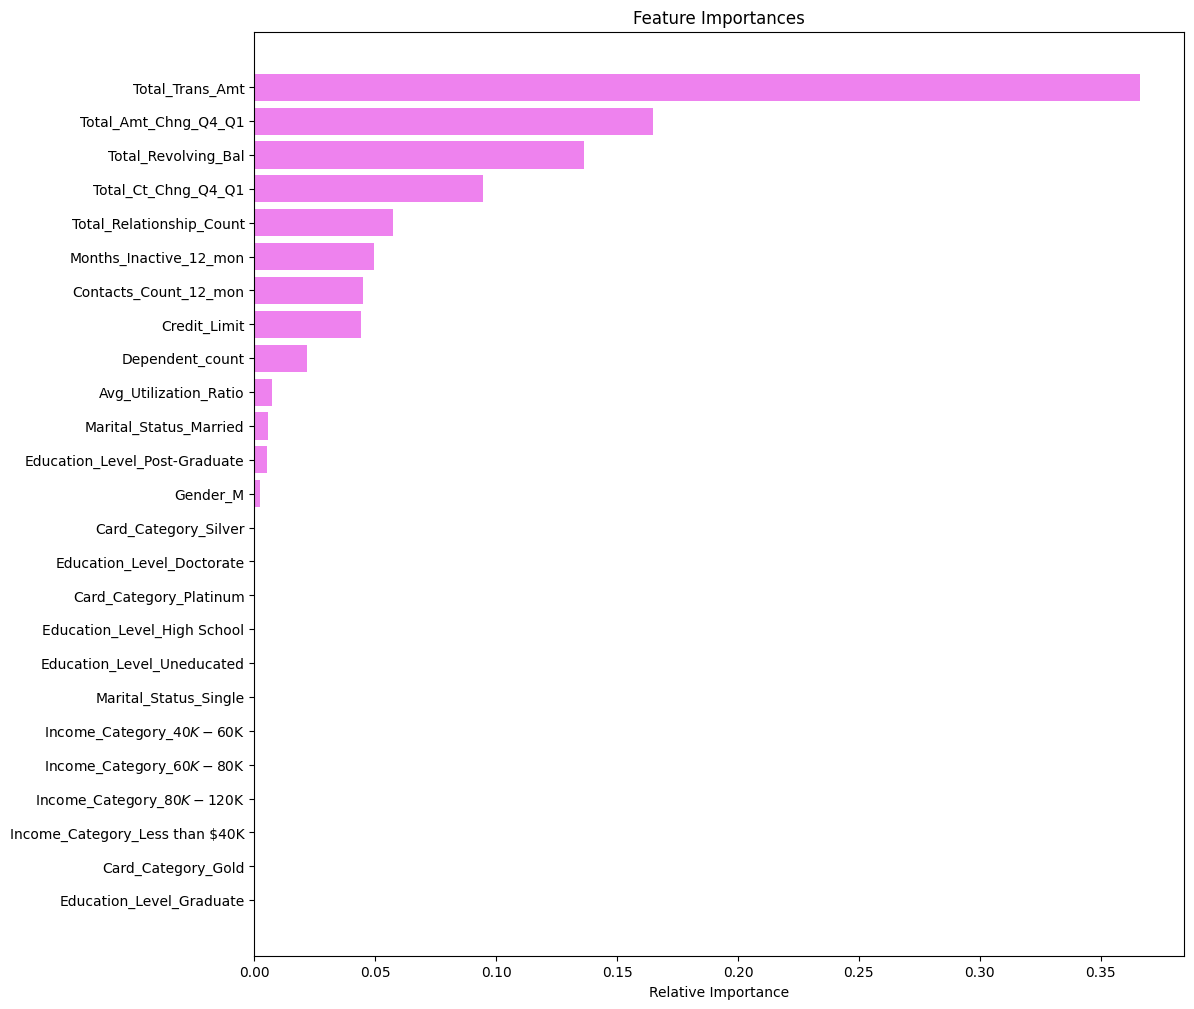

In [ ]:
feature_names = X_train.columns
importances = tuned_adb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- We can see that Total_Trans_Amt,Total_Amt_Chng_Q4_Q1
Total_Revolving_Bal are the most important features for making predictions

# Business Insights and Conclusions

Here are some insights and implications that could be drawn:

**Customer Demographics:**

- **Age and Marital Status:** The diverse age range and predominance of married customers suggest the need for a broad range of financial products catering to different life stages and family needs.
- **Educational Background:** With many customers being graduates, there may be a demand for more sophisticated financial products and services.

**Customer Behavior and Engagement:**

- **Product Engagement:** Active usage of an average of 4 bank products per customer indicates a good level of engagement with the bank’s services.
- **Customer Retention:** A high retention rate signifies effective customer relationship management. However, it's crucial to investigate why some customers leave to further improve retention strategies.

**Financial Profiles:**

- **Credit and Spending:** The wide range of credit limits and revolving balances suggests varied financial behaviors and needs among customers.
- **Income Level:** A significant segment in the lower income bracket might require more affordable and accessible financial products.

**Seasonal and Transactional Patterns:**

- **Seasonal Variations:** Changes in transaction amounts and counts across quarters could indicate seasonal spending patterns, useful for targeted marketing campaigns.
- **Transaction Behavior:**
 Varying levels of transaction amounts and counts reflect diverse customer activity levels, which can be crucial for personalized marketing and service offerings.

**Customer Contact and Inactivity:**

- **Contact Frequency:** The average contact count provides insights into customer service demands and potential areas for improvement.
- **Inactivity Periods:** Understanding periods of inactivity could help in developing strategies to boost engagement and prevent customer attrition.

**Card Preferences:**

- **Card Category:** The dominance of the "Blue" card category suggests that most customers prefer basic financial services, which might indicate a focus area for product development and marketing.

**Correlations and Data Anomalies:**

- **Investigate Anomalies:** Data anomalies, like the 'abc' category in income, should be addressed for data integrity.
- **Analyze Correlations:** High correlations between certain variables, such as credit limit and open-to-buy, might indicate areas where data insights can be streamlined.

**Implications for Marketing and Product Development:**

- **Tailoring Products:** Financial services can be tailored to the predominant demographics (e.g., married graduates in lower income brackets).
- **Customer Education:** Given the educational background of customers, there may be opportunities for financial education initiatives.
- **Risk Management:** Understanding spending and credit behaviors is crucial for managing credit risk and tailoring credit offerings.